# Übung Classifier - Logistische Regression und Decision Trees

Diese Übung bezieht sich auf den iris-Datensatz. Eine Beschreibung hierzu finden Sie unter:

https://en.wikipedia.org/wiki/Iris_flower_data_set

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

Versuchen Sie den Code zu verstehen und kommentieren Sie ihn entsprechend, fügen Sie am Ende dieses Notebooks die Anweisungen zur Modellbildung und Test eines Decision Trees an.

In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [25]:
print(tf.__version__)

2.1.0


In [26]:
df = pd.read_csv('./data/iris_data.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
df.shape

(150, 5)

In [28]:
colors = {'setosa' : 'r', 'versicolor' : 'g', 'virginica' : 'b'}
print(colors)

{'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}


In [29]:
l = len(df['sepal_length'])
print (l)

150


Text(0, 0.5, 'Sepal width')

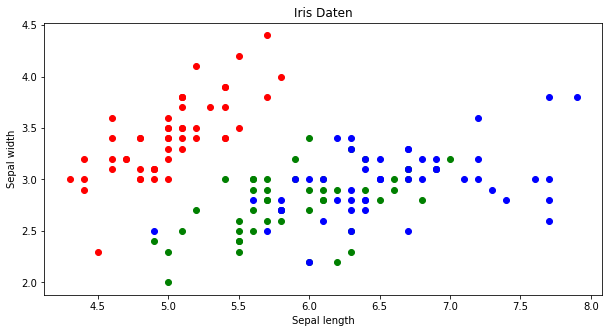

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(df['sepal_length'])):
    l = df['sepal_length'][i]
    w = df['sepal_width'][i]
    sp = df['species'][i]
    col = colors[df['species'][i]]
    #print(i,'\t',l, '\t',w, '\t', sp, '\t', col)
    ax.scatter(l, w, color=col)

ax.set_title('Iris Daten')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')


In [31]:
species_to_int = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

df['species'] = df['species'].map(species_to_int)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print('X:', X.shape,' y:', y.shape)

X: (150, 4)  y: (150,)


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train:', X_train.shape, ' y_train:', y_train.shape)
print('X_test:', X_test.shape, ' y_test:', y_test.shape)

X_train: (120, 4)  y_train: (120,)
X_test: (30, 4)  y_test: (30,)


In [34]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()

log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred = log_clf.predict(X_test)

from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
print('Accuracy:', acc_score)

Accuracy: 1.0


In [36]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()


Ab hier schreiben Sie weiter: Trainieren Sie den Decision Tree und wenden Sie das erhaltene Modell auf X_test an und ermittel Sie die Güte des Modells.